In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats
from sklearn.preprocessing import normalize

In [2]:
"""
Module Code :                   CS3PP19-20-1A
Assignment report Title:        Data Exploration with Python
Student Number :                27020363
Date :                          01-12-2020
Hrs Spent:                      12h
Evaluation :                    N/A
"""

'\nModule Code :                   CS3PP19-20-1A\nAssignment report Title:        Data Exploration with Python\nStudent Number :                27020363\nDate :                          01-12-2020\nHrs Spent:                      12h\nEvaluation :                    N/A\n'

In [3]:
"""
===========================================TASK 01==================================================================
"""

'\n===========================================TASK 01==================================================================\n'

In [4]:
data=pd.read_csv("Datasets/metro.csv")

/Users/stefanos.stefanou/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
"""
Q:Find a sensible way to remove the missing values from the data frame andexplain why you have chosen this method.
A:I choose dropna,as i do not want to introduce any deviations in my model. we have plenty of data (over 90k entries!!) 
so we do not care for loosing some.
"""
pre_proccesed=data.dropna()


<AxesSubplot:ylabel='Frequency'>

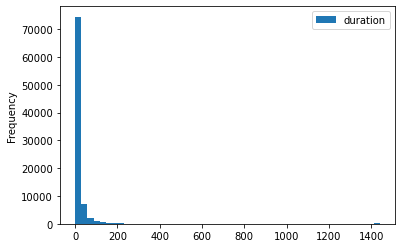

In [6]:
"""
Q:Explore the distribution of the duration variable. 
You should produce a plot visualising the distribution and
calculate and briefly discuss statistics of the variable. 
A:
"""

#First, lets have a look using a histogramm
duration=pre_proccesed.duration
#Here we normalize the data using min-max. 
duration_hist_norm=normalize(np.array(duration).reshape(-1,1), norm='max', axis=0) #to numpy and back to dataframe again!
duration_hist_norm=pd.DataFrame(duration)
duration_hist_norm.plot.hist(bins=50)

'\n~86k data points with mean of 26 and standard deviation = 95\nmin value 1, max 1440. \n25-75 are the percentiles of the distribution.\nPlease note those outliers, a nice idea is to ommit them as is probably noice and they make our model less realistic\n'

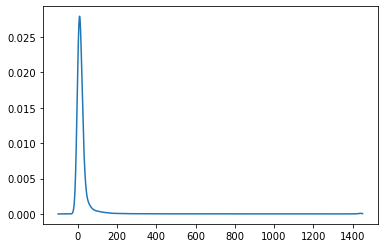

In [7]:
#Hmm...this think seemts to have some sort of logarithmic-normal distribution, lets estimate it

pdf=scipy.stats.gaussian_kde(duration)                   #Gaussian KDE Estimator
xs=np.linspace(min(duration)-100,max(duration)+10,2000)  #Create Datapoints for plot the estimator
# I use (-100,+10 to show the full curve, but not applicable outside range of course)
plt.plot(xs,pdf(xs))
#Yeap, thats true. lets have also a look at the summary statistics.
duration.describe()
"""
~86k data points with mean of 26 and standard deviation = 95
min value 1, max 1440. 
25-75 are the percentiles of the distribution.
Please note those outliers, a nice idea is to ommit them as is probably noice and they make our model less realistic
"""

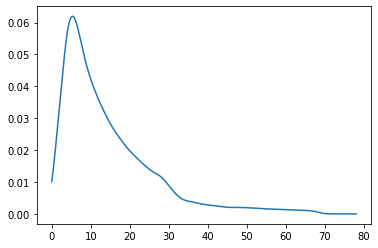

In [8]:
"""
Lets delete the outliers and see if we have any better results!
by ommiting everything bigger that 95% percentuile, we can make more sense of the data! 
note how more clear is the distribution now, with only 5% less accuracy! Nice 
"""
duration_without_noise=duration
duration_without_noise=duration_without_noise.drop(duration_without_noise[duration_without_noise>duration.quantile(0.95)].index)
#duration_without_noise.plot.hist(bins=50)

pdf=scipy.stats.gaussian_kde(duration_without_noise)                   #Gaussian KDE Estimator
xs=np.linspace(0,max(duration_without_noise)+10,2000)               #Create Datapoints for plot the estimator
# I use (-100,+10 to show the full curve, but not applicable outside range of course)
plt.plot(xs,pdf(xs))

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff86cfc6d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff86d72a430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff86cfc69d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff86d72aaf0>,
 'fliers': [],
 'means': []}

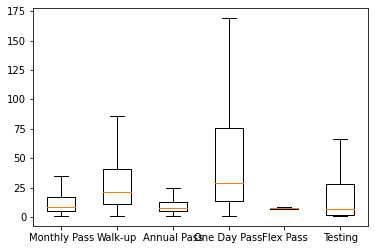

In [9]:
"""
Q:Produce a plot showing how the distribution of duration relates to passholder_type. 
A:
"""
groups=[]
groupnames=pre_proccesed['passholder_type'].unique()
for i in groupnames:
    groups.append(pre_proccesed.duration[pre_proccesed['passholder_type']==i])
#Why not showing outliers? because they are many and making the plot unreadable by any means :) 
plt.boxplot(groups,labels=groupnames,showfliers=False)


In [10]:
"""
Q:Convert the start_time and end_timecolumns to date objects if they are not already. 
A:
"""
to_datetime=lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M')
import datetime
start_time_str=pre_proccesed['start_time']
r=map(to_datetime,start_time_str)
start_time_pandas=pd.DataFrame(r)
pre_proccesed.drop('start_time', axis=1, inplace=False)
pre_proccesed['start_time']=start_time_pandas


end_time_str=pre_proccesed['end_time']
r=map(to_datetime,end_time_str)
end_time_pandas=pd.DataFrame(r)
pre_proccesed.drop('end_time', axis=1, inplace=False)
pre_proccesed['end_time']=end_time_pandas
pre_proccesed=pre_proccesed.dropna()

<ipython-input-10-7ef35ec4a3f0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proccesed['start_time']=start_time_pandas
<ipython-input-10-7ef35ec4a3f0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_proccesed['end_time']=end_time_pandas


In [11]:
pre_proccesed

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,2019-07-01 00:04:00,2019-07-01 00:09:00,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,2019-07-01 00:07:00,2019-07-01 00:16:00,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,2019-07-01 00:20:00,2019-07-01 00:25:00,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,2019-07-01 00:44:00,2019-07-01 01:04:00,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,2019-07-01 00:44:00,2019-07-01 01:11:00,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86755,129723457,7,2019-09-30 23:20:00,2019-09-30 23:34:00,4404,34.048130,-118.271027,3074,34.044170,-118.261169,12191,30,One Way,Monthly Pass,standard
86756,129724732,32,2019-09-30 23:32:00,2019-09-30 23:40:00,4345,33.995560,-118.481552,4346,33.984341,-118.471550,15754,1,One Way,Walk-up,smart
86757,129724952,34,2019-09-30 23:38:00,2019-09-30 23:53:00,4345,33.995560,-118.481552,4346,33.984341,-118.471550,16107,1,One Way,Walk-up,smart
86758,129724953,33,2019-09-30 23:40:00,2019-09-30 23:41:00,4345,33.995560,-118.481552,4346,33.984341,-118.471550,16066,1,One Way,Walk-up,smart


In [12]:
"""
Q:Create a new column in the data frame that gives the hour of the day that each journey started on. 
A:
"""
hr_start=pre_proccesed.start_time
hr_start=hr_start.apply(lambda x:x.hour)
pre_proccesed['24_hour_start']=hr_start

In [13]:
pre_proccesed

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,24_hour_start
0,124657107,5,2019-07-01 00:04:00,2019-07-01 00:09:00,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard,0
1,124657587,9,2019-07-01 00:07:00,2019-07-01 00:16:00,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric,0
2,124658068,5,2019-07-01 00:20:00,2019-07-01 00:25:00,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric,0
3,124659747,20,2019-07-01 00:44:00,2019-07-01 01:04:00,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard,0
4,124660227,27,2019-07-01 00:44:00,2019-07-01 01:11:00,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86755,129723457,7,2019-09-30 23:20:00,2019-09-30 23:34:00,4404,34.048130,-118.271027,3074,34.044170,-118.261169,12191,30,One Way,Monthly Pass,standard,23
86756,129724732,32,2019-09-30 23:32:00,2019-09-30 23:40:00,4345,33.995560,-118.481552,4346,33.984341,-118.471550,15754,1,One Way,Walk-up,smart,23
86757,129724952,34,2019-09-30 23:38:00,2019-09-30 23:53:00,4345,33.995560,-118.481552,4346,33.984341,-118.471550,16107,1,One Way,Walk-up,smart,23
86758,129724953,33,2019-09-30 23:40:00,2019-09-30 23:41:00,4345,33.995560,-118.481552,4346,33.984341,-118.471550,16066,1,One Way,Walk-up,smart,23


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff86be973d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff86be66190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff86be97700>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff86be66280>,
 'fliers': [],
 'means': []}

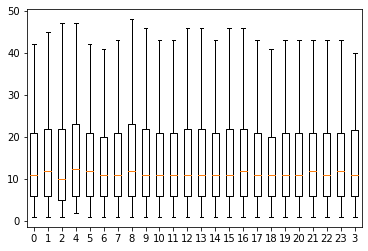

In [14]:
"""
Q:Explore how the duration variable varies between each journey starting hour of the day, 
creating a plot to visualise this. 
A:
"""

groups=[]
groupnames=pre_proccesed['24_hour_start'].unique()
for i in groupnames:
    groups.append(pre_proccesed.duration[pre_proccesed['24_hour_start']==i])
#Why not showing outliers? because they are many and making the plot unreadable by any means :) 
plt.boxplot(groups,labels=groupnames,showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff86c228d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff86c21f1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff86c2286d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff86c21f850>,
 'fliers': [],
 'means': []}

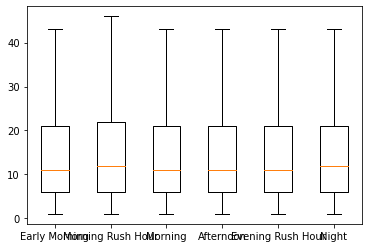

In [15]:
"""
We can also group our day into useful quantiles, extracting more useful info. let
0-6 : Early Morning
6-9: Morning Rush Hour
9-12: Morning
12-18: Afternoon
18-20 : Evening Rush Hour
20-23: Night
"""

def hour_day_group(hour):
    if(0<=hour<=6):return 0
    if(7<=hour<=9):return 1
    elif (10<=hour<=12):return 2
    elif (13<=hour<=18):return 3
    elif (18<=hour<=20):return 4
    elif (21<=hour<=23):return 5

day_period=pre_proccesed.start_time
day_period=day_period.apply(lambda x:hour_day_group(x.hour))
pre_proccesed['day_period']=day_period

groups=[]
groupnames=pre_proccesed['day_period'].unique()
real_group_names=["Early Morning","Morning Rush Hour","Morning","Afternoon","Evening Rush Hour","Night"]
for i in groupnames:
    groups.append(pre_proccesed.duration[pre_proccesed['day_period']==i])
#Why not showing outliers? because they are many and making the plot unreadable by any means :) 
plt.boxplot(groups,labels=real_group_names,showfliers=False)

<AxesSubplot:xlabel='bike_type'>

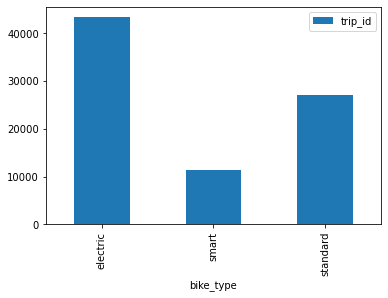

In [16]:
"""
Q:Explore the distribution(?) of the bike type. What kind of bike is more popular?
A:Not sure what 'distribution' means in context of a categorical variable, the popularity 
though can be easily found with a bar-plot of the counts of occurences
"""
bike_types=pre_proccesed[['trip_id','bike_type']].groupby('bike_type').count()
bike_types.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff86e745af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8705861f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff86e745790>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff8705868b0>,
 'fliers': [],
 'means': []}

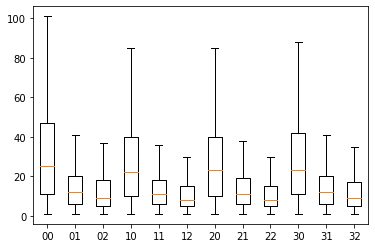

In [17]:
"""
Q:Explore how the distribution of the duration variable varies between each day of the weekand by bike type, 
creating plots to visualise this. Discuss the results
A: The code is below, regarding the results, 'smart' seems to have bigger variation in duration, the other two types are
very close every day in duration time
"""

import itertools
#Step 1: Define Weekend as Friday(4)-Saturday(5)-Sunday(6)
def weekday_group(day):
    if(day==4):return 1
    elif(day==5):return 2
    elif(day==6):return 3
    else:return 0
    

weekend_period=pre_proccesed.start_time
weekend_period=weekend_period.apply(lambda x:weekday_group(x.weekday()))
pre_proccesed['weekend_period']=weekend_period
pre_proccesed.tail(2000)



groups=[]
#Not a good idea, the ordering is not deterministic here, thats why the groupnames will be hardcoded
#groupnames_weekend=pre_proccesed['weekend_period'].unique()  #Group containing Weekend
#groupnames_bikes=pre_proccesed['bike_type'].unique()         #Group containing bike type


groupnames_weekend=[0,1,2,3]  #Group containing Weekend
groupnames_bikes=['smart','electric','standard']         #Group containing bike type
groupnames=list(itertools.product(groupnames_weekend,groupnames_bikes)) #Cartesian product(see below)

"""
I created an antificial variable called weekend_period. now i order to explore what happens on weekend-bike vs duration. i need
to create a box plot with the following categories

           0                          1                2                  3
0  No Weekend - Smart        Friday-Smart       Saturday-Smart         Sunday-Smart
1  No Weekend - Electric     Friday-Electric    Saturday-Electric      Sunday-Electric
2  No Weekend - Standard     Friday-Standard    Saturday-Standard      Sunday-Standard
"""
real_labels=[str(i)+str(j) for i in range(0,4) for j in range(0,3)]  #Create the labels to be drawn according to table
for i in groupnames:
    groups.append(pre_proccesed.duration[(pre_proccesed['weekend_period']==i[0])&(pre_proccesed['bike_type']==i[1])])
plt.boxplot(groups,labels=real_labels,showfliers=False)




In [18]:
"""
Q:Calculate the total numbers of passholders of each type travelling on each weekday. Discuss the results.
A:
"""

#Define WeekDay (0 Monday - 6 Sunday)
weekday=pre_proccesed.start_time
weekday=weekday.apply(lambda x:x.weekday())
pre_proccesed['weekday']=weekday

pre_proccesed.groupby(['weekday','passholder_type'])['trip_id'].count()

weekday  passholder_type
0        Annual Pass         886
         Flex Pass             1
         Monthly Pass       7540
         One Day Pass        497
         Testing               2
         Walk-up            3463
1        Annual Pass         746
         Monthly Pass       7961
         One Day Pass        666
         Testing               2
         Walk-up            3279
2        Annual Pass         834
         Monthly Pass       7809
         One Day Pass        566
         Testing               3
         Walk-up            2985
3        Annual Pass         795
         Flex Pass             2
         Monthly Pass       7792
         One Day Pass        582
         Testing               7
         Walk-up            3284
4        Annual Pass         890
         Flex Pass             3
         Monthly Pass       8328
         One Day Pass        447
         Testing               3
         Walk-up            2610
5        Annual Pass         716
         Monthly P

In [19]:
"""
===========================================TASK 03==================================================================
"""

'\n===========================================TASK 03==================================================================\n'

In [20]:
dataset="Datasets/social-network.csv"

In [21]:
#Initialization
import networkx as nx
edgelist=list()
with open(dataset,"r") as edgelistfile:
    for every_line in edgelistfile.readlines():
        f,t=every_line.split(",")
        edgelist.append((int(f),int(t)))

G=nx.from_edgelist(edgelist)
G

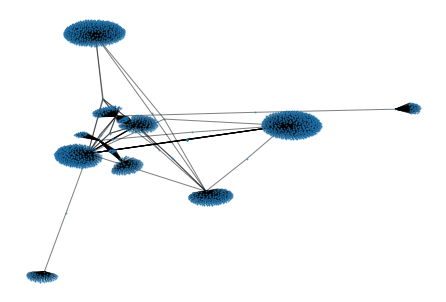

In [22]:
#Visualization
"""
The main feature of this network is its centrality nodes. There are 9 dinstinct clustered regions. There are a small set of nodes
that have a huge impact on the connectivity of the forest,On social network those accounts are usually belonging to people with
influence on others, such as singers.
"""
lay=nx.spring_layout(G)
nx.draw(G,pos=lay,node_size=1,alpha=0.5)

In [23]:
"""
Statistic 1 : Degree Distribution
This network is quite weird, so the usual techiques needs to be applied with special care. This is a hugely clustered
network, lets first have a look on the histogram list
"""

'\nStatistic 1 : Degree Distribution\nThis network is quite weird, so the usual techiques needs to be applied with special care. This is a hugely clustered\nnetwork, lets first have a look on the histogram list\n'

In [24]:
print(nx.degree_histogram(G))


[0, 2790, 82, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
"""
As expected, the overwelming majority of the nodes are just connected to one neighboor. We can easily verify this
claim with the following statements
"""

print(np.array(nx.degree_histogram(G)).sum())
print(np.array(nx.degree_histogram(G)[5:]).sum())
"""
out of 2888 nodes, 2878 of them are connected with less than 4 nodes. Our histogram will be just a huge spike
"""


2888
10


'\nout of 2888 nodes, 2878 of them are connected with less than 4 nodes. Our histogram will be just a huge spike\n'

Text(0, 0.5, 'B')

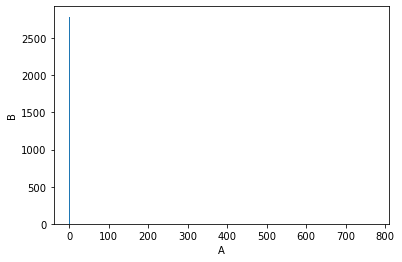

In [26]:
plt.bar(range(0,len(nx.degree_histogram(G))),nx.degree_histogram(G))
plt.xlabel('A')
plt.ylabel('B')

Text(0, 0.5, 'B')

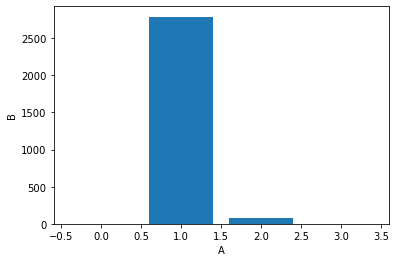

In [27]:
"""
We can create a gentle version of this, with only the first 4 elements. I will perform this because i want to make 
sense of the data, as a human. of course i wont use this altered version in any subquent calculations
"""
plt.bar(range(0,4),nx.degree_histogram(G)[:4])
plt.xlabel('A')
plt.ylabel('B')

(array([2.807e+03, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        7.700e+01]),
 array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
        0.71428571, 0.85714286, 1.        ]),
 <BarContainer object of 7 artists>)

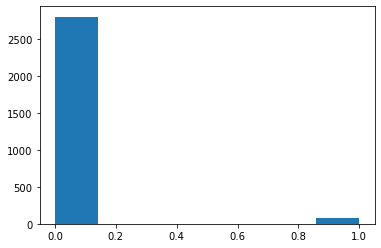

In [28]:
"""
Statistic 2: Clustering Coefficient
This is the statistic i was expecting more. We can now have a closer look at those nodes that keep the
whole forest from becoming seperated connected components
"""
clu=nx.clustering(G)
plt.hist(list(clu.values()),bins=7)


In [29]:
"""
As expected, we have a huge amount of nodes with very low clustering, and a couple of nodes with HUGE clustering (1.0 is the maximum)
We can even sample some of them
"""
clustering_coeff=np.array(list(clu.values()))
filtered=clustering_coeff[clustering_coeff>=0.7]
filtered.shape

(77,)

In [30]:
"""
Statistic 3 : Betweenness Centrallity
Another great statistic for having a closer look into those nodes with very high degree.This statistic is a measure of how
'important' is a given node to the network, with respect to the connected regions, meaning that removing just a few of those
nodes with high centrality may result into multiple regions becoming unreacheable into the forest(separate connected components)

We expect same visual output, as the nature of this network makes this feature very obvious
"""
bc=nx.betweenness_centrality(G)

#bc #(WARN:output is HUGE)


(array([2.874e+03, 5.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.05497065, 0.10994131, 0.16491196, 0.21988262,
        0.27485327, 0.32982393, 0.38479458, 0.43976524, 0.49473589,
        0.54970654]),
 <BarContainer object of 10 artists>)

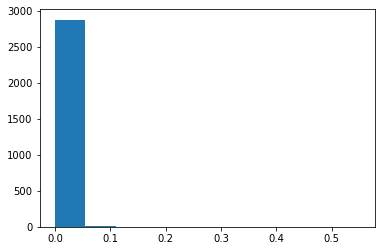

In [31]:
"""
Exacly same picture as above
"""
values=(bc.values())
plt.hist(values)

In [32]:
"""
Exacly the same picture we could expect here from every relational-oriented statistic. So the aforementioned statistics are
considered complete for this network.
"""

'\nExacly the same picture we could expect here from every relational-oriented statistic. So the aforementioned statistics are\nconsidered complete for this network.\n'

In [33]:
"""
===========================================TASK 02==================================================================
"""

'\n===========================================TASK 02==================================================================\n'

In [34]:
#Initialization, no need to drop anything, as there is no NaN values in the dataset
data=pd.read_csv("Datasets/seeds.csv")
%matplotlib inline
#data.dropna()

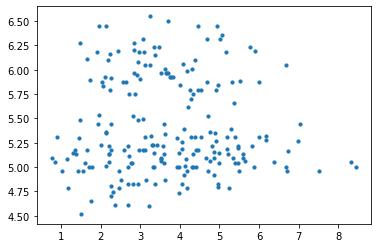

In [35]:
"""
After a little bit of playing, a promising scatterplot appears....
"""
gl=data['groove length']
asymmetry=data.asymmetry
plt.scatter(asymmetry,gl,s=10)

In [36]:
"""
We can see with a bit of imagination(not much fortunately) the two (or three, with the bottom-left outliers)
We will use a K-Means classifier, initially with a groups=3 (for reason see below)
We will split our data into 80-20 to predict and see the accuracy, as the re-submission will definitely result in overfit
(the model will just remember every datapoint, consider the fact that the seeds.csv contains only 210 endpoints )
"""
from sklearn.cluster import KMeans



#Definition
km=KMeans(n_clusters=2)
km.fit(data[:int(len(data)*0.8)])                 #fit 80%
predicted=km.predict(data[int(len(data)*0.8):])   #predict rest of 20%


'\nThis is expected, the outliers formed a new cluster, in 2 cluster setup, we have a huge cluster with the majority of the datapoints\nand the outlier cluster.\n\n'

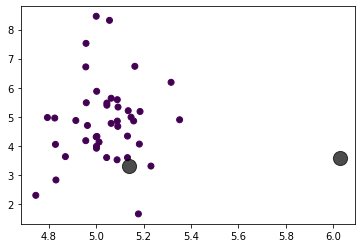

In [37]:
plt.scatter(gl[int(len(data)*0.8):],asymmetry[int(len(data)*0.8):],c=predicted,cmap='viridis')  #scatter predicted
centers_asymmetry=km.cluster_centers_[:,5]  #center for assymentry
centers_gl=km.cluster_centers_[:,6]         #center for gl
plt.scatter(centers_gl,centers_asymmetry,c='black',alpha=0.7,s=200)   #plot the centers 
"""
This is expected, the outliers formed a new cluster, in 2 cluster setup, we have a huge cluster with the majority of the datapoints
and the outlier cluster.

"""

In [38]:
"""

Now, why do i used a K-Means? the answer is simple, this is because of the fact that the given dataset on the given two 
parameters of interest, the cluster boundary is a simple line (the dataset does not have any complex geometry). For this
reason the K-Means will suffice for our application
"""

'\n\nNow, why do i used a K-Means? the answer is simple, this is because of the fact that the given dataset on the given two \nparameters of interest, the cluster boundary is a simple line (the dataset does not have any complex geometry). For this\nreason the K-Means will suffice for our application\n'